In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
from tqdm.auto import tqdm

sys.path.append('../../ready functions in py/')

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Compare the number of iterations for the geometry optimization

In [62]:
num_dims_arr = [2, 3, 4, 5, 10, 30, 50, 100]
threshold_arr = [1e-6, 1e-7, 1e-8]
#num_terminals_arr = np.array([10,20,30,50,70,100,150,200,300,400,500,600,700,800,900,1000])
num_terminals_arr = np.array([10,20])
num_problems = 1000

mean_cost_arr = np.zeros((len(num_dims_arr), len(num_terminals_arr),len(threshold_arr)))
mean_iter_arr = np.zeros((len(num_dims_arr),len(num_terminals_arr),len(threshold_arr)))
std_cost_arr = np.zeros((len(num_dims_arr),len(num_terminals_arr),len(threshold_arr)))
std_iter_arr = np.zeros((len(num_dims_arr),len(num_terminals_arr),len(threshold_arr)))

for k, dim in enumerate(num_dims_arr):
    for i,num_terminals in enumerate(num_terminals_arr):

        #load data:
        pkl_file_path = f"results/smith_iter_alpha_results/Smith_alpha_dim{dim}_probs{num_problems}_size{num_terminals}_new.pkl"
        pkl_file = open(pkl_file_path, 'rb')
        large_results_dict = pickle.load(pkl_file)
        pkl_file.close()

        full_cost_arr = np.zeros((len(threshold_arr), num_problems))
        full_iter_arr = np.zeros((len(threshold_arr), num_problems))

        max_index = -1
        for thread_dict in large_results_dict:
            for key in thread_dict:
                # this counts through the different problems
                max_index += 1
                for j,threshold in enumerate(thread_dict[key]):
                    #print(max_index)
                    full_cost_arr[j,max_index] = thread_dict[key][threshold]["cost"]
                    full_iter_arr[j,max_index] = thread_dict[key][threshold]["num_iters"]


        mean_cost_arr[k,i,:] = np.mean(full_cost_arr, axis=1)
        std_cost_arr[k,i,:] = np.std(full_cost_arr, axis=1) 
        mean_iter_arr[k,i,:] = np.mean(full_iter_arr, axis=1)
        std_iter_arr[k,i,:] = np.std(full_iter_arr, axis=1)    

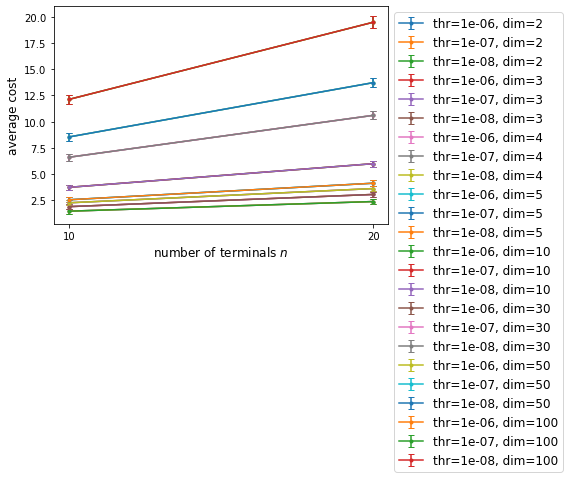

In [63]:
for k, dim in enumerate(num_dims_arr):
    for j,threshold in enumerate(threshold_arr):
        plt.errorbar(num_terminals_arr, mean_cost_arr[k,:,j], yerr=std_cost_arr[k,:,j], fmt=".-", capsize=3, label=f"thr={threshold}, dim={dim}")

plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
plt.ylabel("average cost", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

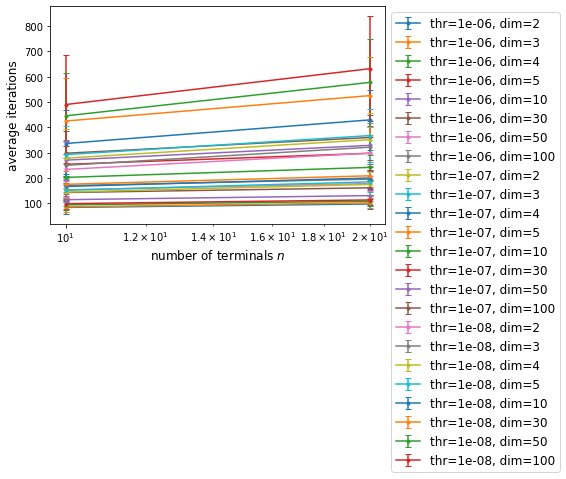

In [64]:
for j,threshold in enumerate(threshold_arr):
    for k, dim in enumerate(num_dims_arr):
        plt.errorbar(num_terminals_arr, mean_iter_arr[k,:,j], yerr=std_iter_arr[k,:,j], fmt=".-", capsize=3, label=f"thr={threshold}, dim={dim}")

plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
plt.ylabel("average iterations", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
plt.xscale("log")
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

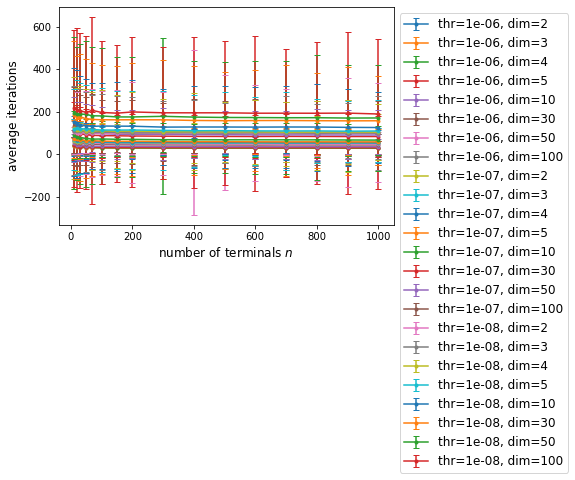

In [60]:
# how do I know something scales like the log?

for j,threshold in enumerate(threshold_arr):
    for k, dim in enumerate(num_dims_arr):
        #plt.errorbar(num_terminals_arr, mean_iter_arr[k,:,j] / num_terminals_arr**(1/10), yerr=std_iter_arr[k,:,j], fmt=".-", capsize=3, label=f"thr={threshold}, dim={dim}")
        #plt.errorbar(num_terminals_arr**(1/100), mean_iter_arr[k,:,j], yerr=std_iter_arr[k,:,j], fmt=".-", capsize=3, label=f"thr={threshold}, dim={dim}")
        plt.errorbar(num_terminals_arr, mean_iter_arr[k,:,j] / np.log(num_terminals_arr), yerr=std_iter_arr[k,:,j], fmt=".-", capsize=3, label=f"thr={threshold}, dim={dim}")

plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
plt.ylabel("average iterations", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
#plt.xticks(num_terminals_arr)
#plt.xscale("log")
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

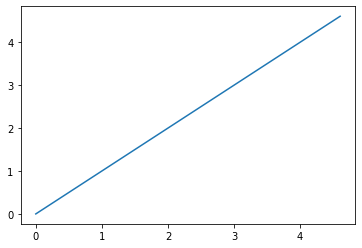

In [32]:
x_arr = np.linspace(1,100)
plt.plot(np.log(x_arr), np.log(x_arr))
#plt.xscale("log")
plt.show()

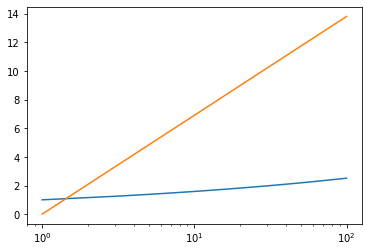

In [51]:
x_arr = np.linspace(1,100)
plt.plot(x_arr, x_arr**(1/5))
plt.plot(x_arr, 3 * np.log(x_arr))
plt.xscale("log")
plt.show()

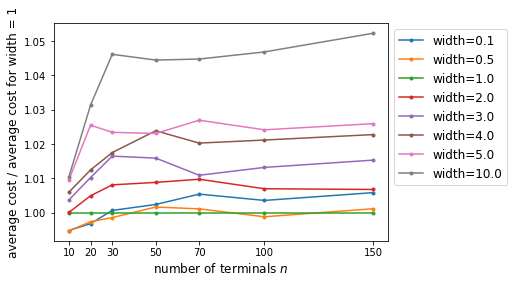

In [112]:
# divide by cost of width=1 approach
norm_mean_cost_arr = mean_cost_arr / (mean_cost_arr[:,2])[:,None]

for j,kernel_width in enumerate(threshold_arr):
    #plt.errorbar(num_terminals_arr, mean_iter_arr[:,j], yerr=std_iter_arr[:,j], fmt=".-", capsize=3, label=f"width={kernel_width}")
    plt.plot(num_terminals_arr, norm_mean_cost_arr[:,j], marker=".", linestyle="-", label=f"width={kernel_width}")

plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
plt.ylabel("average cost / average cost for width = 1", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

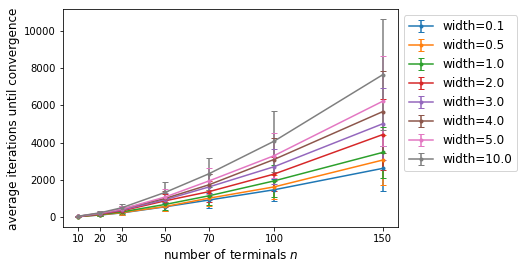

In [120]:
for j,kernel_width in enumerate(threshold_arr):
    plt.errorbar(num_terminals_arr, mean_iter_arr[:,j], yerr=std_iter_arr[:,j], fmt=".-", capsize=3, label=f"width={kernel_width}")

plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
plt.ylabel("average iterations until convergence", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
#plt.yscale("log")
#plt.xscale("log")
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

Interpretation: It makes sense that optimization with the larger kernel takes longer as larger jumps are allowed and in the end one may select not helpful edges and then terminate. For wider kernel one would need a looser convergence criterion. TO get equally good results. For too small kerenels the algorithm is not explorative enough.

c= [  2.93600603   1.35887298 -49.55202076]


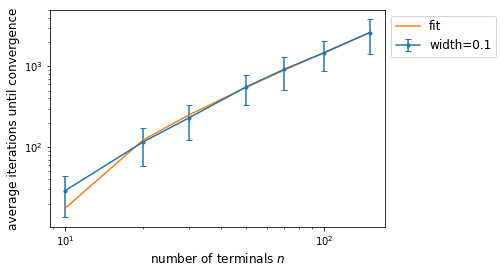

c= [  1.8470512    1.48068317 -30.00892382]


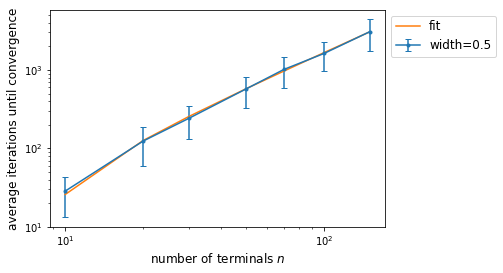

c= [  2.93155587   1.4160182  -61.83624962]


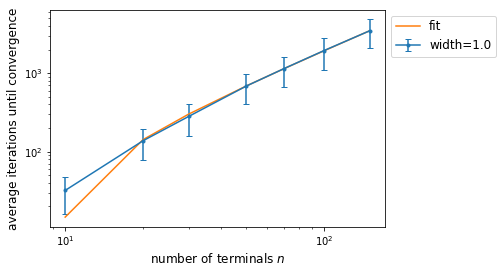

c= [  2.13183235   1.52473911 -27.04639284]


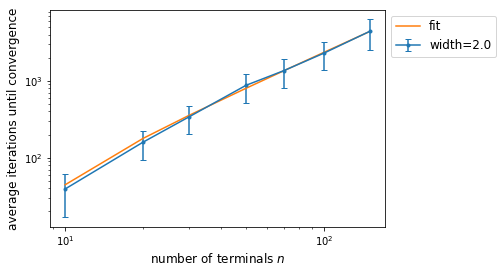

c= [  3.18080745   1.47156331 -68.95031987]


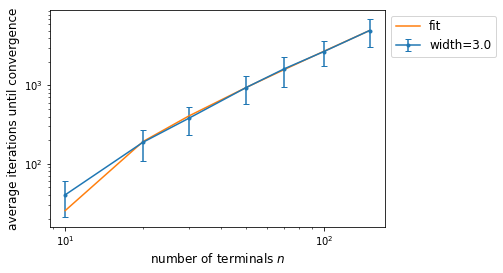

c= [  3.04240999   1.5051133  -69.32019036]


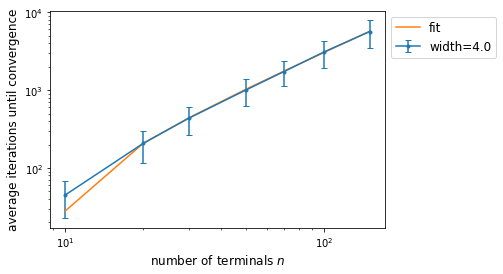

c= [  3.00408424   1.52588523 -74.95913822]


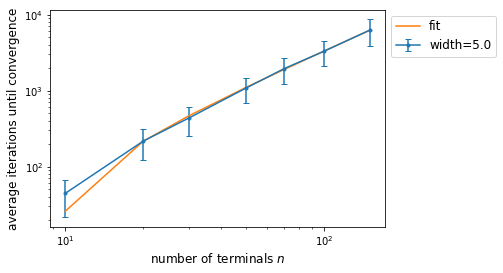

c= [   3.64843881    1.52890124 -111.65812769]


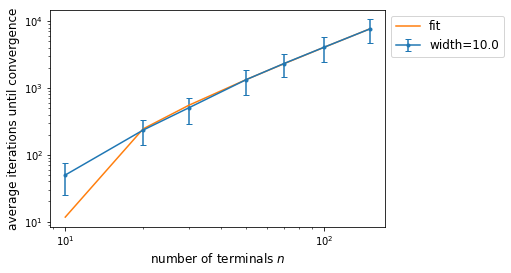

In [137]:
# Investigate teh scaling simply by fitting a curve:

from scipy.optimize import curve_fit
def fit_fct_with_b(x, m, p, b):
    return m*x**p + b

def fit_fct(x, m, p):
    return m*x**p

p_arr = np.zeros(len(threshold_arr))
for j,kernel_width in enumerate(threshold_arr):
    #c, cov = curve_fit(fit_fct, num_terminals_arr, mean_iter_arr[:,j], p0=[3, 1.4])
    c, cov = curve_fit(fit_fct_with_b, num_terminals_arr, mean_iter_arr[:,j], p0=[3, 1.4, -30])
    p_arr[j] = c[1]
    
    # show the fit in log-log plot:
    plt.errorbar(num_terminals_arr, mean_iter_arr[:,j], yerr=std_iter_arr[:,j], fmt=".-", capsize=3, label=f"width={kernel_width}")
    #plt.plot(num_terminals_arr, fit_fct(num_terminals_arr, *c), label="fit")
    plt.plot(num_terminals_arr, fit_fct_with_b(num_terminals_arr, *c), label="fit")
    
    print("c=", c)
    plt.legend(fontsize= 12, bbox_to_anchor=(1, 1))
    plt.ylabel("average iterations until convergence", fontsize= 12)
    plt.xlabel("number of terminals $n$", fontsize= 12)
    plt.xticks(num_terminals_arr)
    plt.yscale("log")
    plt.xscale("log")
    #plt.savefig("iter_conv.pdf", bbox_inches="tight")
    plt.show()

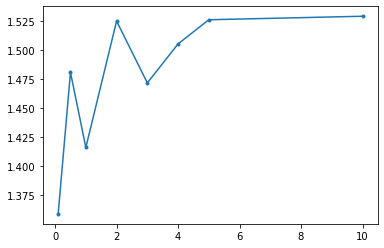

In [138]:
plt.plot(threshold_arr, p_arr, marker=".", linestyle="-")
plt.show()

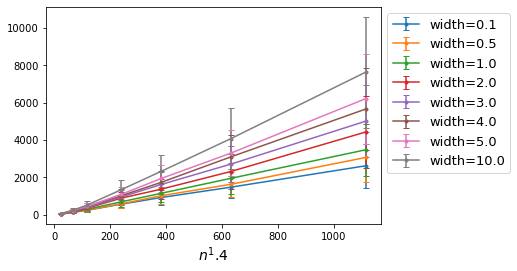

In [113]:
# Investigate the scaling:

exp = 1.4
ticks_arr = np.array([10,50,100,150])
ticks_str = []
for num_terminals in ticks_arr:
    ticks_str.append(f"${num_terminals}^" + "{1.4}$")

for j,kernel_width in enumerate(threshold_arr):
    plt.errorbar(num_terminals_arr**exp, mean_iter_arr[:,j], yerr=std_iter_arr[:,j], fmt=".-", capsize=3, label=f"width={kernel_width}")
    # plt.errorbar(num_terminals_arr, mean_iter_arr[:,j]/num_terminals_arr**exp, yerr=std_iter_arr[:,j], fmt=".-", capsize=3, label=f"width={kernel_width}")
    # plt.plot(num_terminals_arr, mean_iter_arr[:,j]/num_terminals_arr**exp, marker=".", linestyle="-", label=f"width={kernel_width}")


#plt.errorbar(num_terminals_arr, mean_full_arr, yerr=std_full_arr, fmt=".-", capsize=3, label="iterations till full tree")
plt.legend(fontsize = 13, bbox_to_anchor=(1, 1))
#plt.ylabel("average iterations till convergence", fontsize = 13)
plt.xlabel(f"$n^{exp}$", fontsize = 14)
#plt.xticks(ticks_arr**exp, ticks_str, fontsize=11)
#plt.savefig("iter_conv15.pdf", bbox_inches="tight")
plt.show()

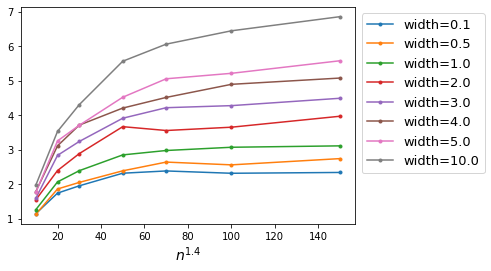

In [111]:
# Investigate the scaling:

exp = 1.4
ticks_arr = np.array([10,50,100,150])
ticks_str = []
for num_terminals in ticks_arr:
    ticks_str.append(f"${num_terminals}^" + "{1.4}$")

for j,kernel_width in enumerate(threshold_arr):
    # plt.errorbar(num_terminals_arr**exp, mean_iter_arr[:,j], yerr=std_iter_arr[:,j], fmt=".-", capsize=3, label=f"width={kernel_width}")
    # plt.errorbar(num_terminals_arr, mean_iter_arr[:,j]/num_terminals_arr**exp, yerr=std_iter_arr[:,j], fmt=".-", capsize=3, label=f"width={kernel_width}")
    plt.plot(num_terminals_arr, mean_iter_arr[:,j]/num_terminals_arr**exp, marker=".", linestyle="-", label=f"width={kernel_width}")


#plt.errorbar(num_terminals_arr, mean_full_arr, yerr=std_full_arr, fmt=".-", capsize=3, label="iterations till full tree")
plt.legend(fontsize = 13, bbox_to_anchor=(1, 1))
#plt.ylabel("average iterations till convergence", fontsize = 13)
plt.xlabel("$n^{1.4}$", fontsize = 14)
#plt.xticks(ticks_arr**exp, ticks_str, fontsize=11)
#plt.savefig("iter_conv15.pdf", bbox_inches="tight")
plt.show()

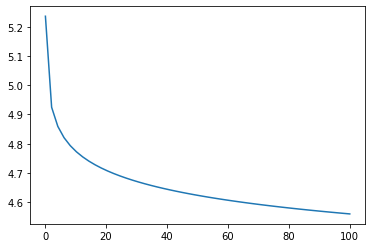

In [96]:
def toy_fct(x, m,b,p):
    return m*x**p + b

x_arr = np.linspace(0.1,100)
m = 5
b = 0
p = 1.7

plt.plot(x_arr, toy_fct(x_arr, m,b,p) / x_arr**1.72)
plt.show()

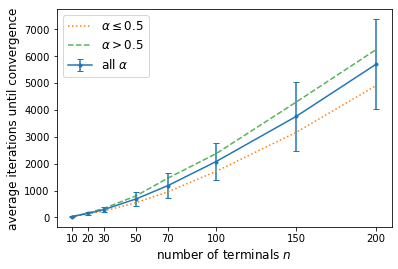

In [5]:
plt.errorbar(num_terminals_arr, mean_conv_arr, yerr=std_conv_arr, fmt=".-", capsize=3, label="all $\\alpha$")
#plt.errorbar(num_terminals_arr, mean_conv_low, yerr=std_conv_low, fmt=".-", capsize=3, label="low alpha")
#plt.errorbar(num_terminals_arr, mean_conv_high, yerr=std_conv_high, fmt=".-", capsize=3, label="high alpha")

plt.plot(num_terminals_arr, mean_conv_low, ":", label="$\\alpha \\leq 0.5$")
plt.plot(num_terminals_arr, mean_conv_high, "--", label="$\\alpha > 0.5$", alpha = 0.8)


#plt.errorbar(num_terminals_arr, mean_cost_arr, yerr=std_cost_arr, fmt=".-", capsize=3, label="iterations till cost tree")
plt.legend(fontsize= 12)
plt.ylabel("average iterations until convergence", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

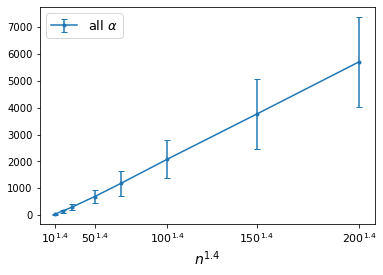

In [15]:
exp = 1.4
ticks_str = []
for num_terminals in np.array([10,50,100,150,200]):
    ticks_str.append(f"${num_terminals}^" + "{1.4}$")

plt.errorbar(num_terminals_arr**exp, mean_conv_arr, yerr=std_conv_arr, fmt=".-", capsize=3, label="all $\\alpha$")
#plt.errorbar(num_terminals_arr, mean_conv_low, yerr=std_conv_low, fmt=".-", capsize=3, label="low alpha")
#plt.errorbar(num_terminals_arr, mean_conv_high, yerr=std_conv_high, fmt=".-", capsize=3, label="high alpha")

#plt.plot(num_terminals_arr**exp, mean_conv_low, ":", label="$\\alpha \\leq 0.5$")
#plt.plot(num_terminals_arr**exp, mean_conv_high, "--", label="$\\alpha > 0.5$", alpha = 0.8)


#plt.errorbar(num_terminals_arr, mean_full_arr, yerr=std_full_arr, fmt=".-", capsize=3, label="iterations till full tree")
plt.legend(fontsize = 13)
#plt.ylabel("average iterations till convergence", fontsize = 13)
plt.xlabel("$n^{1.4}$", fontsize = 14)
plt.xticks(np.array([10,50,100,150,200])**exp, ticks_str, fontsize=11)
plt.savefig("iter_conv15.pdf", bbox_inches="tight")
plt.show()

### Analyse the alpha-dependence:

For each problem, subtract the number of iterations from the mean. And add the difference to an array depending on the value of alpha. Seperate the alpha interval into 20 segments.

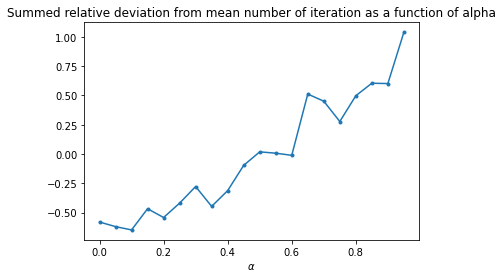

In [6]:
num_segments = 20

convergence_per_seg = np.zeros(num_segments)
problems_per_seg = np.zeros(num_segments)

for i,num_terminals in enumerate(num_terminals_arr):
    
    #load data:
    pkl_file_path = f"results/MC_star_probs150_size{num_terminals}_new.pkl"
    pkl_file = open(pkl_file_path, 'rb')
    large_results_dict = pickle.load(pkl_file)
    pkl_file.close()
    
    for thread_dict in large_results_dict:
        for key in thread_dict:
            iter_conv = thread_dict[key]['iter_till_converged']
            al = thread_dict[key]["bot_problem_dict"]["al"]
            
            segment = int(al * num_segments)
            problems_per_seg[segment] += 1
            convergence_per_seg[segment] += (iter_conv - mean_conv_arr[i])/std_conv_arr[i]
            
plt.title("Summed relative deviation from mean number of iteration as a function of alpha")
plt.plot(np.arange(num_segments)/num_segments, convergence_per_seg/problems_per_seg, ".-")
plt.xlabel("$\\alpha$")
plt.show()

al = 0.8181211503680234


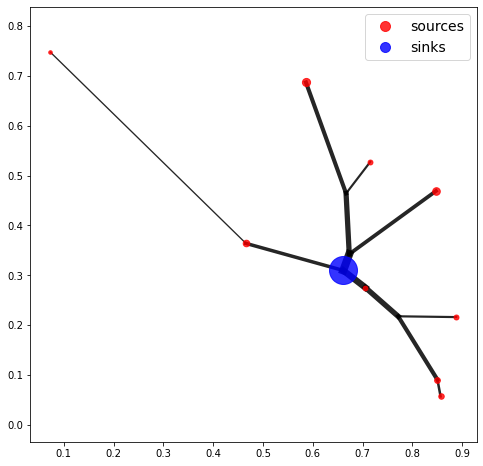

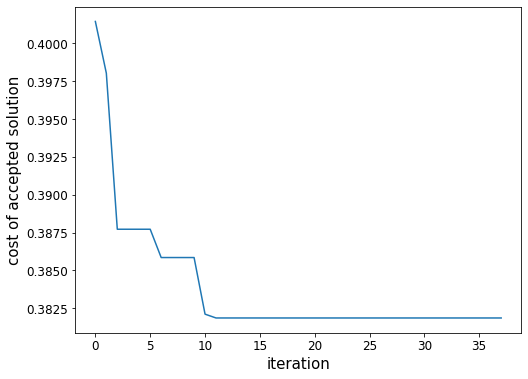

al = 0.18523802402416079


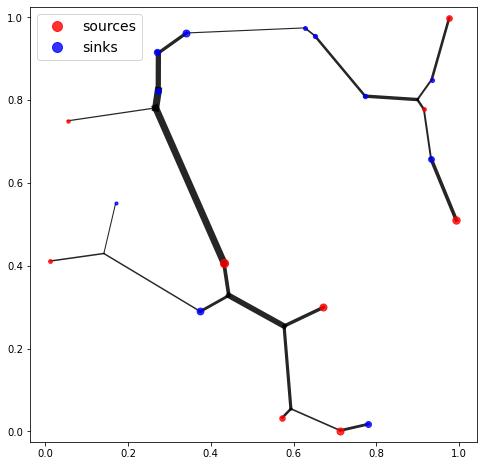

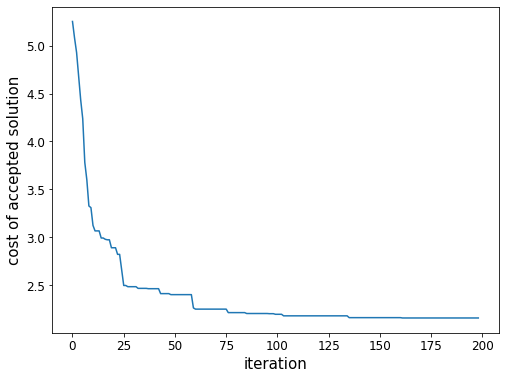

al = 0.7675767014856414


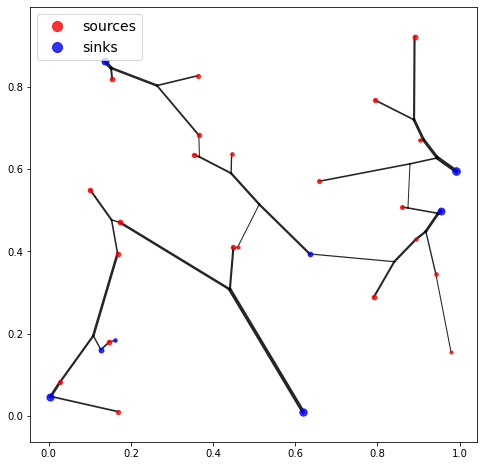

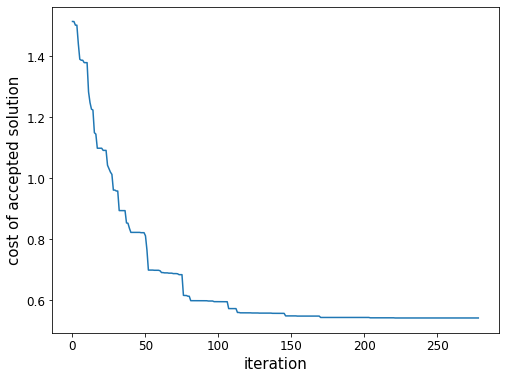

al = 0.7868864759056357


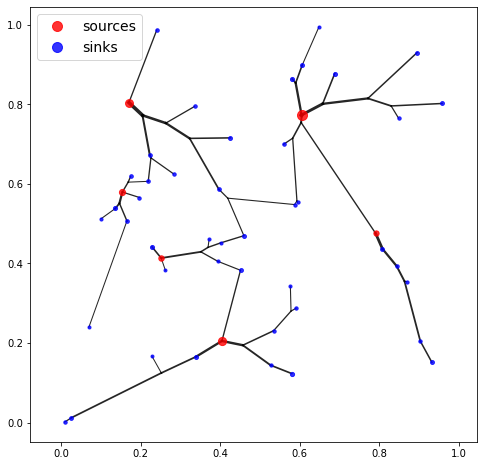

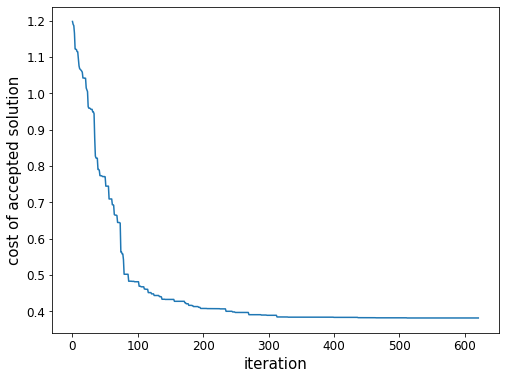

al = 0.27320599611903607


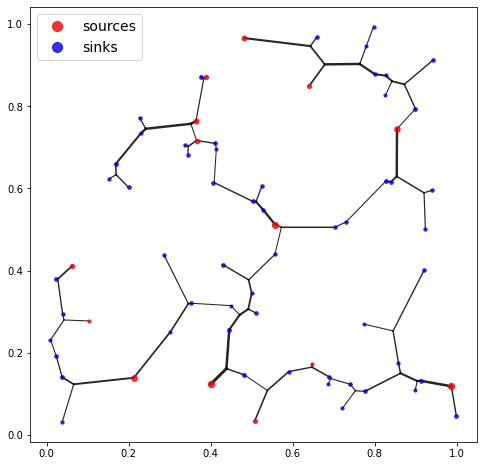

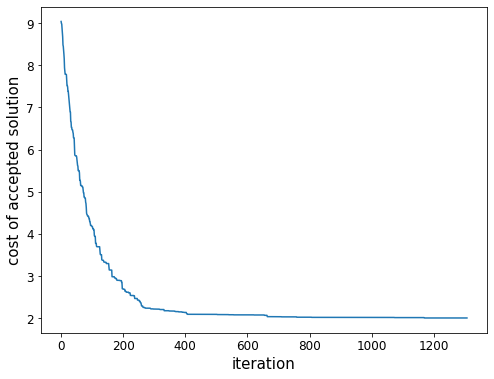

al = 0.6051269092817325


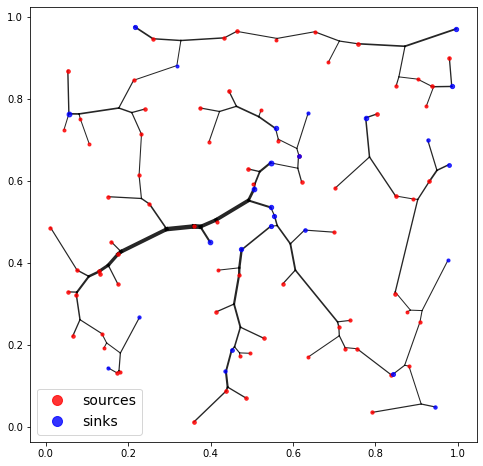

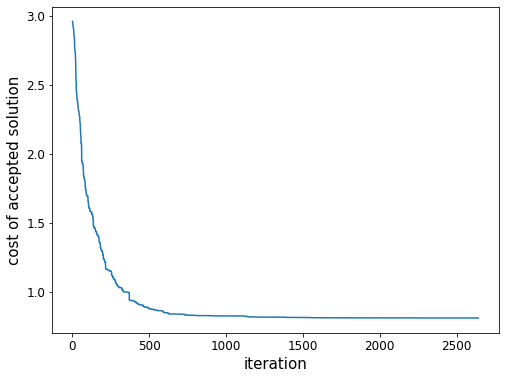

al = 0.06197514218342004


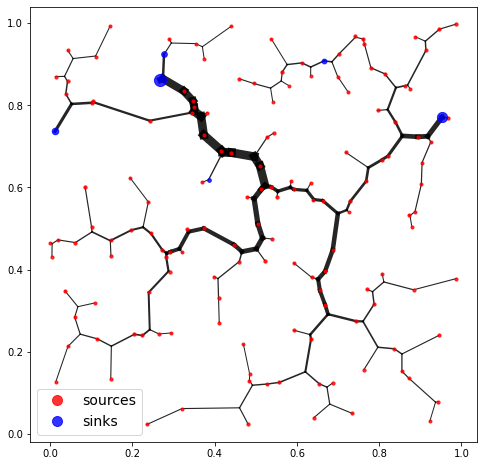

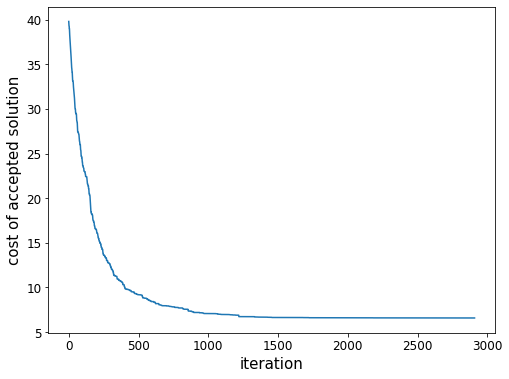

al = 0.7292800905742304


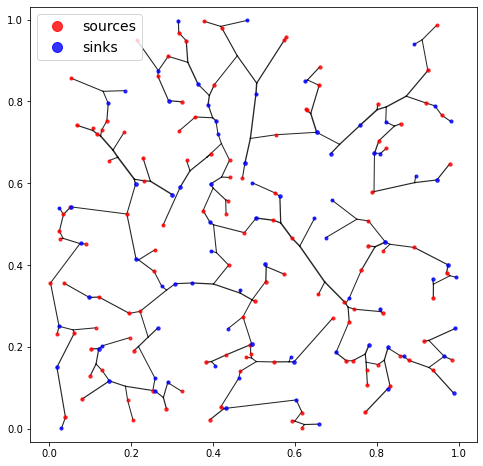

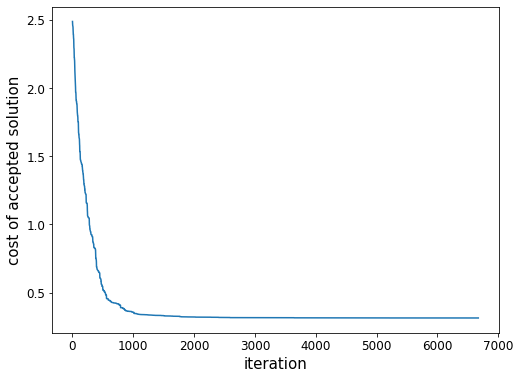

In [7]:
#check if the convergence criterion is okay and visually check the solutions:
np.random.seed(5438)
for i,num_terminals in enumerate(num_terminals_arr):
    
    #load data:
    pkl_file_path = f"results/MC_star_probs150_size{num_terminals}_new.pkl"
    pkl_file = open(pkl_file_path, 'rb')
    large_results_dict = pickle.load(pkl_file)
    pkl_file.close()
    
    thread_dict = large_results_dict[3]
    random_key = np.random.randint(len(thread_dict))
    
    # show solutions:
    bot_problem_dict = thread_dict[random_key]['bot_problem_dict']
    al = bot_problem_dict["al"]
    coords_sources = bot_problem_dict["coords_sources"]
    coords_sinks = bot_problem_dict["coords_sinks"]
    supply_arr = bot_problem_dict["supply_arr"]
    demand_arr = bot_problem_dict["demand_arr"]
    print("al =",al)
    MC_topo = thread_dict[random_key]["final_topo"]
    
    cost, coords_iter = iterative_bot_solver(MC_topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                        relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=1000,
                                        plot=True, title="", fov=None, save=False, save_name=f"img_{num_terminals}")
    
    # print cost_arr:
    cost_arr = thread_dict[random_key]['cost_arr']
    iter_conv = thread_dict[random_key]['iter_till_converged']
    
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(len(cost_arr)), cost_arr)
    plt.xlabel("iteration",fontsize = 15)
    plt.ylabel("cost of accepted solution",fontsize = 15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.savefig(f"sim-ann_{num_terminals}.pdf")
    plt.show()

In [16]:
for _ in range(10):
    print(np.random.randint(2))

1
1
0
0
0
1
0
0
0
1


In [20]:
int(np.invert(bool(1)))

0